In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [174]:
from_date = date(2018, 1, 15)
days = int(365 / 12)
df = None
while True:
    try:
        if df is None:
            df  = pd.read_excel('../' + from_date.strftime('%Y%m_') + 'inst.xlsx')
        else:
            df_ = pd.read_excel('../' + from_date.strftime('%Y%m_') + 'inst.xlsx')
            df = pd.concat([df, df_])
        
        from_date += timedelta(days)
    except:
        break

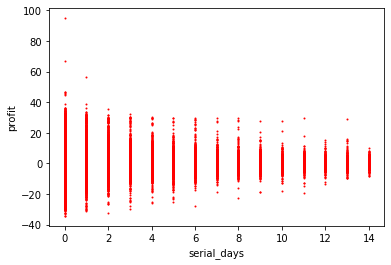

In [175]:
df.plot(kind='scatter', x='serial_days', y='profit', color='red', s=1)

In [176]:
len(df)

610771

In [177]:
df['plus'] = df['profit'] > 0

In [178]:
df.corr()

,Unnamed: 0,profit,serial_days,amount_avg,prevday_amount,today_amount,kosdaq_20ma,prevday_kosdaq,plus
Unnamed: 0,1.000000,-0.023594,-0.009787,-0.004850,-0.006674,-0.001718,-0.091115,-0.092902,-0.030843
profit,-0.023594,1.000000,-0.004799,-0.004625,-0.013057,0.106972,-0.011969,0.011455,0.642945
serial_days,-0.009787,-0.004799,1.000000,0.185416,0.023685,0.024475,0.028705,0.025622,0.004040
amount_avg,-0.004850,-0.004625,0.185416,1.000000,0.276714,0.211869,0.027440,0.025990,0.002623
prevday_amount,-0.006674,-0.013057,0.023685,0.276714,1.000000,0.450147,0.037468,0.037304,0.000837
today_amount,-0.001718,0.106972,0.024475,0.211869,0.450147,1.000000,0.033841,0.040071,0.047389
kosdaq_20ma,-0.091115,-0.011969,0.028705,0.027440,0.037468,0.033841,1.000000,0.951025,-0.009047
prevday_kosdaq,-0.092902,0.011455,0.025622,0.025990,0.037304,0.040071,0.951025,1.000000,0.004714
plus,-0.030843,0.642945,0.004040,0.002623,0.000837,0.047389,-0.009047,0.004714,1.000000


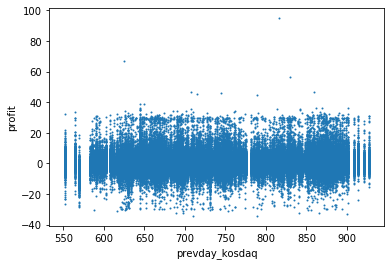

In [179]:
df.plot(kind='scatter', x='prevday_kosdaq', y='profit', s=1)
# 전날 코스닥에 따른 금일 수익률

61077


,Unnamed: 0,date,code,profit,serial_days,amount_avg,prevday_amount,today_amount,kosdaq_20ma,prevday_kosdaq,plus
10335,10335,2019-02-15,A214270,0.00,0,0.0,6542000000,663000000,714.720493,738.659973,False
7772,7772,2019-08-08,A171090,-0.39,0,0.0,6542000000,1697000000,636.002509,585.440002,False
9803,9803,2018-12-12,A091580,4.74,0,0.0,6542000000,2349000000,690.692999,676.479980,True
12992,12992,2019-03-15,A208340,-0.80,0,0.0,6542000000,57715000000,746.119003,748.359985,False
19543,19543,2019-07-19,A090150,3.77,0,0.0,6542000000,2988000000,685.146503,674.059998,True
...,...,...,...,...,...,...,...,...,...,...,...
16626,16626,2019-01-18,A101000,0.00,0,0.0,0,0,676.204007,696.340027,False
13132,13132,2019-09-17,A112240,0.00,0,0.0,0,0,615.932007,644.280029,False
13129,13129,2019-09-17,A111820,0.00,0,0.0,0,0,615.932007,644.280029,False
13118,13118,2019-09-17,A108860,0.00,0,0.0,0,0,615.932007,644.280029,False


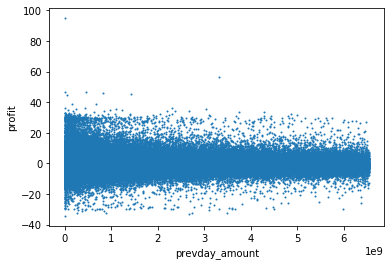

In [180]:
prevday_amount_df =  df.sort_values(by=['prevday_amount'], ascending=False)
print(int(len(prevday_amount_df) * 0.1)) # cut 10% big values
prevday_amount_df = prevday_amount_df[int(len(prevday_amount_df) * 0.1):]
prevday_amount_df.plot(kind='scatter', x='prevday_amount', y='profit', s=1)
prevday_amount_df
# 전날 거래금액에 따른 금일 수익률

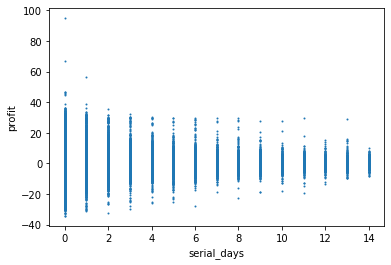

In [181]:
df.plot(kind='scatter', x='serial_days', y='profit', s=1)

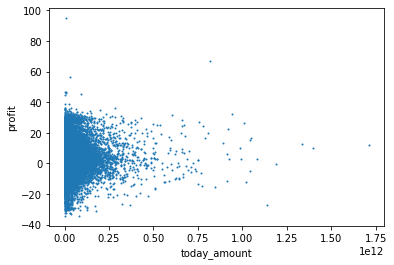

In [182]:
df.plot(kind='scatter', x='today_amount', y='profit', s=1)

In [183]:
df.describe()

,Unnamed: 0,profit,serial_days,amount_avg,prevday_amount,today_amount,kosdaq_20ma,prevday_kosdaq
count,610771.000000,610771.000000,610771.000000,6.107710e+05,6.107710e+05,6.107710e+05,610771.000000,610771.000000
mean,13383.748973,-0.060167,0.727842,6.913420e+07,3.560812e+09,3.430605e+09,748.419714,745.993062
std,7842.675819,3.350881,1.755826,4.918426e+08,1.683815e+10,1.621552e+10,84.880598,88.208700
min,0.000000,-34.380000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,593.692502,551.500000
25%,6638.000000,-1.600000,0.000000,0.000000e+00,1.580000e+08,1.580000e+08,680.729501,670.849976
50%,13277.000000,0.000000,0.000000,0.000000e+00,5.690000e+08,5.690000e+08,742.538501,736.809998
75%,19916.000000,1.230000,1.000000,1.401000e+04,2.065000e+09,2.048000e+09,819.358493,826.690002
max,30936.000000,94.840000,14.000000,6.947642e+10,1.710927e+12,1.710927e+12,889.109998,927.049988


In [184]:
amount_mean = df['prevday_amount'].mean()
df[df['prevday_amount'] > amount_mean]['profit'].mean()

-0.22854304957577293

In [185]:
df[df['prevday_amount'] <= amount_mean]['profit'].mean()

-0.026054721803267723

In [202]:
prevamount_big_df =  df.sort_values(by=['prevday_amount'], ascending=False)

In [203]:
prevamount_big_df = prevamount_big_df[:int(len(df)*0.1)]

In [204]:
print(len(prevamount_big_df), len(df), int(len(df)*0.1))

61077 610771 61077


serial days: 0  mean: -0.3015628704546081
serial days: 1  mean: -0.21622012636205476
serial days: 2  mean: -0.14819408974826703
serial days: 3  mean: -0.3461069932323558
serial days: 4  mean: -0.17033713974986403
serial days: 5  mean: -0.20647887323943662
serial days: 6  mean: -0.6218951612903226
serial days: 7  mean: -0.26372384937238486
serial days: 8  mean: -0.32474626865671646
serial days: 9  mean: -0.4321621621621622
serial days: 10  mean: -0.6316233766233766
serial days: 11  mean: -0.7622535211267605


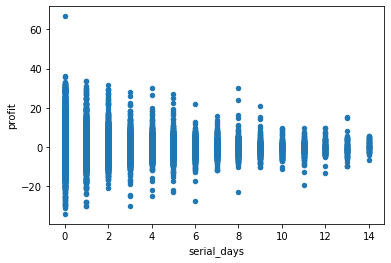

In [205]:
prevamount_big_df.plot(kind='scatter', x='serial_days', y='profit' )
for i in range(12):
    print('serial days:', i, ' mean:', prevamount_big_df[prevamount_big_df['serial_days'] == i]['profit'].mean())

In [206]:
# KOSDAQ 이 MA 보다 높은 경우와 낮은 경우의 차이 Testing
df['kosdaq_20ma'] > df['prevday_kosdaq']

0        False
1        False
2        False
3        False
4        False
         ...  
29035     True
29036     True
29037     True
29038     True
29039     True
Length: 610771, dtype: bool

In [207]:
under_ma_df = df[df['kosdaq_20ma'] > df['prevday_kosdaq']]

In [208]:
over_ma_df = df[df['kosdaq_20ma'] < df['prevday_kosdaq']]

In [209]:
under_ma_df['profit'].describe()

count    303642.000000
mean         -0.233354
std           3.590610
min         -34.380000
25%          -1.940000
50%          -0.190000
75%           1.260000
max          94.840000
Name: profit, dtype: float64

In [210]:
over_ma_df['profit'].describe()

count    307129.000000
mean          0.111054
std           3.086145
min         -32.940000
25%          -1.320000
50%           0.000000
75%           1.210000
max          45.080000
Name: profit, dtype: float64

In [3]:
profit_df  = pd.read_excel('../summary.xlsx')

In [3]:
account_df = pd.read_excel('account.xlsx')

In [4]:
profit_df

,Unnamed: 0,date,code,profit,profit_r,yesterday_kosdaq,yesterday_ma
0,0,2018-01-02,A038290,-7812.500000,-0.781250,812.450012,770.378006
1,1,2018-01-02,A269620,-11597.938144,-1.159794,812.450012,770.378006
2,2,2018-01-02,A058820,74732.559892,7.473256,812.450012,770.378006
3,3,2018-01-02,A039200,93023.255814,9.302326,812.450012,770.378006
4,4,2018-01-02,A206560,-18779.342723,-1.877934,812.450012,770.378006
...,...,...,...,...,...,...,...
4018,4018,2019-12-13,A321550,-3095.975232,-0.309598,643.450012,638.537003
4019,4019,2019-12-13,A058820,12626.262626,1.262626,643.450012,638.537003
4020,4020,2019-12-13,A240810,-4316.546763,-0.431655,643.450012,638.537003
4021,4021,2019-12-13,A101490,42857.142857,4.285714,643.450012,638.537003


In [5]:
account_df

,Unnamed: 0,date,code,trade,price,profit
0,0,2018-01-02,A058820,BUY,6637,0.000000
1,1,2018-01-02,A058820,SELL,7228,8.904626
2,2,2018-01-02,A086520,BUY,39700,0.000000
3,3,2018-01-02,A086520,SELL,39650,-0.125945
4,4,2018-01-02,A057680,BUY,6823,0.000000
...,...,...,...,...,...,...
11892,11892,2019-12-06,A067630,SELL,20700,1.719902
11893,11893,2019-12-06,A218410,BUY,33900,0.000000
11894,11894,2019-12-06,A260660,BUY,13900,0.000000
11895,11895,2019-12-06,A260660,SELL,13850,-0.359712


In [5]:
profit_df['profit_r'] -= 0.25

In [6]:
profit_df['profit_r'].mean()

0.6757410453579711

In [7]:
profit_df['month'] = profit_df['date'].map(lambda d: d.month)
profit_df['year'] = profit_df['date'].map(lambda d: d.year)
profit_df['day'] = profit_df['date'].map(lambda d: d.day)

In [8]:
profit_df[profit_df['year'] == 2018]['profit_r'].mean()

0.7190324738271843

In [9]:
profit_df[profit_df['year'] == 2019]['profit_r'].mean()

0.626195897744218

In [10]:
# 2019-12-11 algorithm results
for year, y in profit_df.groupby(['year']):
    for month, m in y.groupby(['month']):
        print('|', year,'|', month, '|', m['profit_r'].mean(), '|', m['profit_r'].sum(), '|')

| 2018 | 1 | 1.3443552750338763 | 318.6122001830287 |
| 2018 | 2 | 1.2457376135375002 | 183.12342919001253 |
| 2018 | 3 | 0.7629198562227468 | 163.26484923166782 |
| 2018 | 4 | 0.5325891350303804 | 109.71336181625837 |
| 2018 | 5 | 0.5526063253330329 | 96.70610693328075 |
| 2018 | 6 | 0.6329244084396562 | 87.34356836467256 |
| 2018 | 7 | 0.4759662756617913 | 87.57779472176959 |
| 2018 | 8 | 0.5840075944551414 | 115.04949610766285 |
| 2018 | 9 | 0.8688907048546636 | 132.94027784276352 |
| 2018 | 10 | 0.09759002203613217 | 15.907173591889542 |
| 2018 | 11 | 0.2714799531366213 | 50.76675123654819 |
| 2018 | 12 | 1.2517651512836319 | 182.75771208741025 |
| 2019 | 1 | 0.9597691594937359 | 166.04006459241631 |
| 2019 | 2 | 0.494173400472949 | 84.50365148087428 |
| 2019 | 3 | 0.2588125178894848 | 44.77456559488087 |
| 2019 | 4 | 0.9105485839331935 | 180.28861961877232 |
| 2019 | 5 | 0.6053074178336081 | 102.29695361387977 |
| 2019 | 6 | 0.6521349747406108 | 97.82024621109161 |
| 2019 | 7 | 0.

In [11]:
first_period_df = profit_df[(profit_df['year'] == 2018) & (profit_df['month'] == 1)]

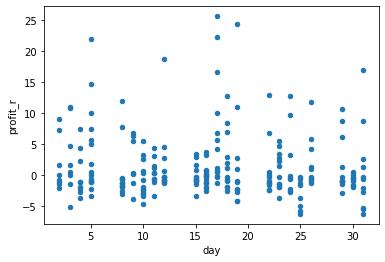

In [12]:
first_period_df.plot(kind='scatter', x='day', y='profit_r')

In [13]:
profit_df[(profit_df['year'] == 2018) & (profit_df['month'] == 1) & (profit_df['day'] == 2)]

,Unnamed: 0,date,code,profit,profit_r,yesterday_kosdaq,yesterday_ma,month,year,day
0,0,2018-01-02,A038290,-7812.500000,-1.031250,812.450012,770.378006,1,2018,2
1,1,2018-01-02,A269620,-11597.938144,-1.409794,812.450012,770.378006,1,2018,2
2,2,2018-01-02,A058820,74732.559892,7.223256,812.450012,770.378006,1,2018,2
3,3,2018-01-02,A039200,93023.255814,9.052326,812.450012,770.378006,1,2018,2
4,4,2018-01-02,A206560,-18779.342723,-2.127934,812.450012,770.378006,1,2018,2
5,5,2018-01-02,A144510,-5736.137667,-0.823614,812.450012,770.378006,1,2018,2
6,6,2018-01-02,A166480,3460.207612,0.096021,812.450012,770.378006,1,2018,2
7,7,2018-01-02,A028300,18867.924528,1.636792,812.450012,770.378006,1,2018,2


In [14]:
print(profit_df['profit_r'].sum())
print(profit_df[profit_df['year'] == 2019]['profit_r'].sum())
# 2018 data

2718.506225475118
1174.743504168153


In [16]:
profit_df['profit'].sum()

38017076.655918285

### statistics
* daily trade count average : 6.747368421052632 
* daily trade max count : 16

### 2018 profit_r without ma skipping
* sum: 855.8272166680617
* get profit: 670, loss: 1070

### 2019 profit_r without ma skipping
* sum: 563.8103111
* get profit: 558, loss: 897

### Overall with ma skipping
* 2018 sum: 471, 2019 sum: 315
* total sum: 786
* get profit: 671, loss: 1034
* 2018 get profit: 343, loss: 530
* 2019 get profit: 328, loss: 504

### Overall without ma skipping
* total sum: 1419

### Overall without ma skipping (price exceed 10%)
* total sum: 1356
* total get profit: 1227, loss: 2012    (37%)

### Overal without ma skipping(use from 2 bottom points instead of 3)
* total sum: 2806
* total get profit: 1658, loss: 2324    (41%)

### Profit rate by year, month
|year|month|profit average|profit sum|
|------|---|-------------------|--------------------|
| 2018 | 1 | 0.708807927794842 | 141.05277763117357 |
| 2018 | 2 | 0.7513828239175151 | 90.16593887010181 |
| 2018 | 3 | 0.7487308772820384 | 131.0279035243567 |
| 2018 | 4 | 0.5102338654008687 | 87.76022484894942 |
| 2018 | 5 | 0.11160019165046285 | 14.954425681162022 |
| 2018 | 6 | 0.09324627202331646 | 10.909813826728026 |
| 2018 | 7 | 0.13046624224511758 | 19.96133506350299 |
| 2018 | 8 | 0.9393545036566318 | 142.78188455580803 |
| 2018 | 9 | 0.5343139519220901 | 67.85787189410544 |
| 2018 | 10 | 0.2368945578828958 | 33.16523810360541 |
| 2018 | 11 | 0.01796935765608807 | 2.3899245682597137 |
| 2018 | 12 | 0.9644057466127851 | 113.79987810030865 |
| 2019 | 1 | 0.700476653381194 | 105.7719746605603 |
| 2019 | 2 | 0.2776552666148775 | 38.038771526238214 |
| 2019 | 3 | 0.19888889032432283 | 28.242222426053843 |
| 2019 | 4 | 0.7011633066773648 | 112.18612906837838 |
| 2019 | 5 | 0.42620390546161846 | 55.4065077100104 |
| 2019 | 6 | 0.06811826740637801 | 7.49300941470158 |
| 2019 | 7 | 0.2829512322365054 | 39.330221280874255 |
| 2019 | 8 | 0.8934993658711528 | 99.17842961169795 |
| 2019 | 9 | 0.5133316852266318 | 55.953153689702866 |
| 2019 | 10 | 0.23496180534643488 | 30.545034695036534 |
| 2019 | 11 | -0.1864819830835076 | **-18.834680291434267** |
| 2019 | 12 | 0.23332305209041315 | 10.499537344068592 |

In [17]:
len(profit_df[profit_df['profit_r'] > 0.])

1658

In [18]:
len(profit_df[profit_df['profit_r'] < 0.])

2324

In [19]:
profit_over_ma_df = profit_df[profit_df['yesterday_kosdaq'] > profit_df['yesterday_ma']]

In [20]:
profit_over_ma_df['profit_r'].sum()

1567.897603715157

In [21]:
profit_df['profit_r'].sum()

1356.3006283594946

In [42]:
len(profit_over_ma_df[(profit_over_ma_df['profit_r'] < 0.) & (profit_over_ma_df['year'] == 2019)])

504

In [49]:
worst_profit_df = profit_df[(profit_df['year'] == 2019) & (profit_df['month'] == 11)]

In [50]:
worst_profit_df.sort_values(by='profit_r')

,Unnamed: 0,date,code,profit,profit_r,yesterday_kosdaq,yesterday_ma,month,year,day
3151,3151,2019-11-28,A133750,-96202.531646,-9.870253,640.179993,658.089505,11,2019,28
3115,3115,2019-11-15,A131760,-48969.072165,-5.146907,668.510010,661.152496,11,2019,15
3129,3129,2019-11-19,A084850,-48076.923077,-5.057692,662.530029,662.491501,11,2019,19
3131,3131,2019-11-20,A040350,-42016.806723,-4.451681,649.869995,662.036002,11,2019,20
3118,3118,2019-11-15,A121800,-36900.369004,-3.940037,668.510010,661.152496,11,2019,15
...,...,...,...,...,...,...,...,...,...,...
3109,3109,2019-11-14,A311390,59063.136456,5.656314,663.309998,660.061496,11,2019,14
3080,3080,2019-11-07,A108230,61002.178649,5.850218,666.150024,655.370999,11,2019,7
3092,3092,2019-11-11,A104480,83200.000000,8.070000,661.369995,657.948996,11,2019,11
3106,3106,2019-11-13,A114450,125000.000000,12.250000,661.849976,659.360495,11,2019,13


In [62]:
day_avg_count = []
for y, year_df in profit_df.groupby(by='year'):
    for m, month_df in year_df.groupby(by='month'):
        for d, day_df in month_df.groupby(by='day'):
            print(y, m, d, len(day_df))
            day_avg_count.append(len(day_df))

2018 1 2 9
2018 1 3 6
2018 1 4 8
2018 1 5 12
2018 1 8 9
2018 1 9 8
2018 1 10 8
2018 1 11 9
2018 1 12 9
2018 1 15 10
2018 1 16 12
2018 1 17 9
2018 1 18 13
2018 1 19 8
2018 1 22 8
2018 1 23 10
2018 1 24 8
2018 1 25 7
2018 1 26 9
2018 1 29 10
2018 1 30 8
2018 1 31 9
2018 2 1 8
2018 2 2 8
2018 2 5 3
2018 2 6 2
2018 2 7 6
2018 2 8 11
2018 2 9 4
2018 2 12 13
2018 2 13 5
2018 2 14 9
2018 2 19 9
2018 2 20 2
2018 2 21 9
2018 2 22 6
2018 2 23 3
2018 2 26 8
2018 2 27 7
2018 2 28 7
2018 3 2 8
2018 3 5 5
2018 3 6 9
2018 3 7 9
2018 3 8 5
2018 3 9 11
2018 3 12 15
2018 3 13 4
2018 3 14 5
2018 3 15 12
2018 3 16 10
2018 3 19 6
2018 3 20 8
2018 3 21 11
2018 3 22 5
2018 3 23 4
2018 3 26 7
2018 3 27 10
2018 3 28 7
2018 3 29 11
2018 3 30 13
2018 4 2 13
2018 4 3 8
2018 4 4 10
2018 4 5 6
2018 4 6 8
2018 4 9 12
2018 4 10 7
2018 4 11 14
2018 4 12 2
2018 4 13 11
2018 4 16 7
2018 4 17 9
2018 4 18 8
2018 4 19 5
2018 4 20 5
2018 4 23 6
2018 4 24 5
2018 4 25 3
2018 4 26 9
2018 4 27 10
2018 4 30 14
2018 5 2 5
2018 5 

In [64]:
import statistics
print(statistics.mean(day_avg_count), max(day_avg_count))

6.747368421052632 16


In [56]:
day_avg_count

[65,
 116,
 97,
 111,
 123,
 77,
 98,
 112,
 100,
 106,
 114,
 132,
 82,
 108,
 106,
 109,
 108,
 124,
 117,
 89,
 115,
 107,
 95,
 95,
 96,
 116,
 108,
 107,
 96,
 111,
 65,
 65,
 116,
 97,
 111,
 123,
 77,
 98,
 112,
 100,
 106,
 114,
 132,
 82,
 108,
 106,
 109,
 108,
 124,
 117,
 89,
 115,
 107,
 95,
 95,
 96,
 116,
 108,
 107,
 96,
 111,
 65,
 65,
 116,
 97,
 111,
 123,
 77,
 98,
 112,
 100,
 106,
 114,
 132,
 82,
 108,
 106,
 109,
 108,
 124,
 117,
 89,
 115,
 107,
 95,
 95,
 96,
 116,
 108,
 107,
 96,
 111,
 65,
 65,
 116,
 97,
 111,
 123,
 77,
 98,
 112,
 100,
 106,
 114,
 132,
 82,
 108,
 106,
 109,
 108,
 124,
 117,
 89,
 115,
 107,
 95,
 95,
 96,
 116,
 108,
 107,
 96,
 111,
 65,
 65,
 116,
 97,
 111,
 123,
 77,
 98,
 112,
 100,
 106,
 114,
 132,
 82,
 108,
 106,
 109,
 108,
 124,
 117,
 89,
 115,
 107,
 95,
 95,
 96,
 116,
 108,
 107,
 96,
 111,
 65,
 65,
 116,
 97,
 111,
 123,
 77,
 98,
 112,
 100,
 106,
 114,
 132,
 82,
 108,
 106,
 109,
 108,
 124,
 117,
 89,
 115,
 107,